<a href="https://colab.research.google.com/github/harnalashok/classification/blob/main/5_otto_tsne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://lvdmaaten.github.io/tsne/
# Try UMAP
# https://sciencenotes.org/html-codes-for-greek-letters/

Understanding Stochastic Neighbourhood embedding
==================================================


### Step 1: Fitting probability distribution in m-dimensional space

>	1. Start, in step-wise fashion with fitting a probability distribution over each one of the points of our data spread over in m-dimensional space.
>	2. The probbaility distribution fitted will be Gaussian (Normal) distribution.
>	3. So, start with some point, say, `i`, and fit a gaussian (normal) probability distribution over it with this point as center (`mean`, &mu;) and stddev = &sigma;<sub>i</sub>. But how to calculate &sigma;<sub>i</sub>? We will soon see. 
>	4. Once normal distribution is fitted over point `i`, calculate the probability that one would pick a point, `j` (or beyond), as its neighbour. Let this probability be p<sub>ij</sub>.
>	5. For fitting (1) above, we need to know the variance of probability distribution over `i`.
>	6. Calculate this variance manually by taking approx 30 to 50 points nearby. Nearby, here means nearness measured as per euclidean distance.
>	7. Since spread of points around `i` and around `j` will be different,so &sigma;<sub>i</sub> and &sigma;<sub>j</sub> may be different.
>	8. Therefore, p<sub>ij</sub> is not necessarily equal to p<sub>ji</sub> (that is the point `j` may not pick point `i` as its neighbour). So begin by
taking an average of the two.
>	9. Repeat steps (2) to (8) for all points and calculate pair-wise probabilities between all points. For many points, pairwise probabilites will be zero as the pair of points are very far away.
>	10.Consequently you will have a prob table something like below:

	         (for three points)

				  1	   2	 3
			1	 p11	p12	p13
			2	 p21	p22	p23
			3	 p31	p32	p33




## Step 2: We now fit above probability distribution in a 2D space

>	10. In the two dimensional space, we also use Gaussian prob distribution (of course shape of this distribution will be different). 
>	11. We start with plotting point, `i`, anywhere on x-y plane.
>	12. Then, around point, `i`, we construct a gaussian prob-distribution with this point as center (mean) and a 'constant' variance.
>	13. Next place point, `j`, (anywhere around `i`) at a point on x-y plane such that its probability is p<sub>ij</sub> (that is as in above prob table).

> 14. Now a third point `k` is to be plotted as a neighbor of point `i`. Let among themselves, `i, j, k` have the following probabilities:

>> p<sub>ij</sub> = 0.5<br>
>> p<sub>ik</sub> = 0.02<br>
>> p<sub>jk</sub> = 0.3<br>

>  One way to plot these three points in a 2D plane would be, as follows (0 => indicates point location):

		
			0(=i)   0(=j)

				   0(k)
	   
>  Why? Because point 'j' should be near to point 'i' (p<sub>ij</sub> is high); point `k` should be far from point `i` (p<sub>ik</sub> low) but point `k`
should be near to point `j` (p<sub>jk</sub> high). There can, thus, be many ways to plot points `i, j and k` in 2D keeping probabilities (almost)
same. Hence, if there are many independent processes making the plots, each set of points may project and draw different shapes.

> Also, when mapping these probabilites to two dimensional space, it is possible that when we adjust points, we have to adjust some probabilites and in this mutual adjusting process p<sub>ij</sub>  becomes 0.4, p<sub>ik</sub> becomes 0.01 and p<sub>jk</sub> = 0.25 because other points are also to be plotted. So the probaility distribution around point, `i`, will be somewhat different in the 2D space than the probability distribution around point, `i` in the original m-dimensaional space. Here comes the role of [Kullback–Leibler](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) divergence. See [this](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) simple example to see of how KL divergence is calculated.



In [ ]:
# 1.0 Clear memory
#%reset -f

## A. Data manipulation

# 1.1 Call data manipulation libraries
import pandas as pd
import numpy as np


## D. Data preprocessing
# 1.4.1 Scaling data in various manner
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

## G: Others
# 1.10 Misc/visualization
import os, time, gc
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1.11 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# 2.0 Set datafile path
path = "/content/"
os.chdir(path)
# 2.1 Read train file
train = pd.read_csv("train.csv.zip")

In [ ]:
# 2.2 Look at data
train.shape                        # 61878 X 95
print()
train.head(2)
print()
train.dtypes.value_counts()        # All features are integers except target

(61878, 95)

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,...,0,0,2,0,0,11,0,1,1,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1


int64     94
object     1
dtype: int64

In [ ]:
# 2.3 Target classes--absolute vs normalized
train.target.value_counts()
print("\n\n--normalized--\n")
train.target.value_counts(normalize=True)

Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
Name: target, dtype: int64



--normalized--



Class_2    0.260545
Class_6    0.228433
Class_8    0.136785
Class_3    0.129351
Class_9    0.080077
Class_7    0.045881
Class_5    0.044265
Class_4    0.043489
Class_1    0.031174
Name: target, dtype: float64

In [ ]:
# 2.4  Check if there are Missing/duplicate values? None
train.isnull().sum()            # None
train.isnull().sum().sum()      # None
train.duplicated().sum()        # None

id         0
feat_1     0
feat_2     0
feat_3     0
feat_4     0
          ..
feat_90    0
feat_91    0
feat_92    0
feat_93    0
target     0
Length: 95, dtype: int64

0

0

In [ ]:
# 2.5 Drop 'id' and save target column in another variable
train.drop(columns = ['id'] , inplace = True)
y = train.pop('target')   # Target

In [ ]:
# 2.6 Data is very skewed
train.describe()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,...,feat_54,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
count,61878.00000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,...,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000,61878.000000
mean,0.38668,0.263066,0.901467,0.779081,0.071043,0.025696,0.193704,0.662433,1.011296,0.263906,1.252869,0.140874,0.480979,1.696693,1.284398,1.413459,0.366108,0.575423,0.551699,0.471525,0.204014,0.729969,0.142522,2.643880,1.534520,0.563108,0.696613,0.238970,0.275768,0.150312,0.148680,1.043796,0.696516,0.946411,0.666263,0.709089,0.263632,0.582129,0.485585,1.653059,...,2.072465,0.323120,0.303775,0.309108,0.697970,0.388603,1.029930,0.239746,1.187563,0.168590,1.256796,0.222228,0.571706,2.897653,0.392902,0.811128,0.892789,0.319290,0.858722,0.591050,0.579851,0.726817,0.748457,0.124196,0.366415,0.300446,0.698067,0.078461,0.187983,0.496719,0.070752,0.532306,1.128576,0.393549,0.874915,0.457772,0.812421,0.264941,0.380119,0.126135
std,1.52533,1.252073,2.934818,2.788005,0.438902,0.215333,1.030102,2.255770,3.474822,1.083340,3.042333,0.567089,2.014697,3.163212,3.862236,2.226163,1.477436,1.335985,4.636145,1.438727,0.696050,1.446220,0.782979,4.629015,2.332994,1.710305,2.873222,0.828112,1.901294,1.640880,0.897354,2.416849,1.310202,3.368622,3.197965,2.555119,0.756934,1.602579,3.298315,3.299798,...,4.113319,0.998743,1.925806,1.082148,3.983722,2.577693,3.028469,1.017553,2.666742,0.946158,3.402080,0.783052,1.361874,4.974322,1.761054,4.111091,1.941368,1.162443,2.411646,5.783233,3.757822,3.200095,2.920038,0.906621,2.778317,1.285569,2.245671,0.461244,0.836269,2.434921,1.151460,1.900438,2.681554,1.575455,2.115466,1.527385,4.597804,2.045646,0.982385,1.201720
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [ ]:
# 3.0 Reduce Memory usage
print("--Current memory usage (MB) --\n")
train.memory_usage().sum()/1000000  # 46.03736MB

# 3.1
print("\n\n--Max and min values---\n")
train.max().max()               # 352
print()
train.min().min()               # 0

# 3.2 Change dtype
train = train.astype('uint16')

# 3.3
print("\n\n--Revised memory usage (MB) --\n")
train.memory_usage().sum()/1000000  # 11.509436 MB

--Current memory usage (MB) --



46.03736



--Max and min values---



352

0



--Revised memory usage (MB) --



11.509436

In [ ]:
train.shape

(61878, 93)

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
sss =  StratifiedShuffleSplit(n_splits = 1, test_size = 30000)
for train_index, test_index in sss.split(train, y):
    X_train, X_test = train.loc[train_index,:], train.loc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]

In [ ]:
pca = PCA(n_components=0.95)
X = pca.fit_transform(X_train)

In [ ]:
X.shape   # (61878, 57)

(31878, 56)

In [ ]:
start = time.time()
tsne = TSNE(perplexity=30, n_jobs = 2, early_exaggeration = 30)
res = tsne.fit_transform(X)
end = time.time()
(end - start)/60   # 7 min

7.209821995099386

In [ ]:
y_test

In [ ]:
res = pd.DataFrame(res, columns= ['x','y'])

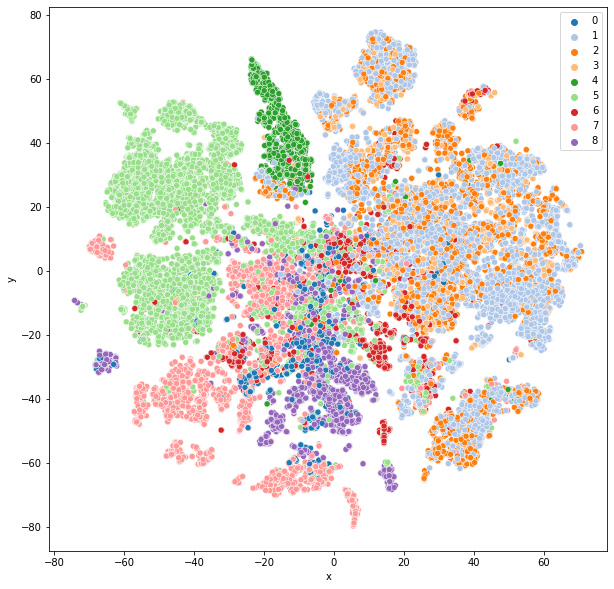

In [ ]:
# To plot the embedding
# Colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html
fig = plt.figure(figsize = (10,10))
#plt.scatter(res.x, res.y, lw=0.1,c= y_train, cmap=plt.cm.get_cmap('cubehelix', 6))
#plt.colorbar(ticks=range(6), label='digit value')
#plt.clim(-0.5, 5.5)
_=sns.scatterplot(data=res, x='x', y='y', hue=y_train, palette='tab20')

In [ ]:
!wget -nc https://github.com/rapidsai/notebooks-extended/raw/master/utils/rapids-colab.sh
!bash rapids-colab.sh

import sys, os

sys.path.append('/usr/local/lib/python3.6/site-packages/')
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'

--2021-05-15 11:18:41--  https://github.com/rapidsai/notebooks-extended/raw/master/utils/rapids-colab.sh
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rapidsai-community/notebooks-contrib/raw/master/utils/rapids-colab.sh [following]
--2021-05-15 11:18:41--  https://github.com/rapidsai-community/notebooks-contrib/raw/master/utils/rapids-colab.sh
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 404 Not Found
2021-05-15 11:18:41 ERROR 404: Not Found.

bash: rapids-colab.sh: No such file or directory
